# Acceleration Tests

The goal of this notepad is to find out what would be the best acceleration algorithm for the CarOne project.

The essence of the algorithm is to try to figure out what would be the outcome in the neer future and adjust the acceleration to reach that.

Withoud adding future as a feature, did not manage to get stable velocity just waves.

The actual code in `carone.ino` file a bit different. Practically optimized to save CPU cycles, therefore uses integers only and avoid divistions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def autocruising(_t, _m, _a, _Vt, _V0 = 0, _IncF = 100, _Fc = 0):
    """
       _t: list of time
       _m: mass in kg
       _a: base acceleration
      _Vt: desired autocruising velocity
      _V0: start velocity
    _IncF: increments for force in Newtons
      _Fc: start force / current force
    """
    _Ac = 0 # current acceleration
    _At = 0 # target acceleration
    _Tf = 1 # advence for future acceleration
    _Vf = 0 # future velocity
    _Af = 0 # future acceleration
    _v = [_V0] # velocities [start velocity]
    _MaxF = 1000
    for i, time in enumerate(_t):
        if i == 0:
            continue
        _Vf = _Ac * _Tf + _v[i-1] # expected velocity in future based on actual acceleration
        if (_Ac > 0 and _Vf > _Vt) or (_Ac < 0 and _Vf < _Vt): # if future speed exceed target speed
            _At = (_Vt - _Vf) / _Tf # than lower target acceleration
        else: # target accleration should follow base acceleration unless current and target speed are same
            _At = ( math.copysign(_a, _Vt - _v[i-1]) if (_v[i-1] != _Vt) else 0)
        if (_Ac != _At): # if target and current acceleration are mismatch
            _Fc = _Fc + math.copysign(_IncF, _At - _Ac) # than increment or decrement the force
        if (_MaxF < math.copysign(_Fc, 1)): # if actual force exceed max allowed force
            _Fc = math.copysign(_MaxF, _Fc) # than capped at max force
        _Ac = _Fc / _m # calculate actual acceleration
        _t_diff = _t[i] - _t[i-1] # time diff between two samples
        _v.append(_v[i-1] + _Ac * _t_diff) # add datapoint to velocity graph
    return _v


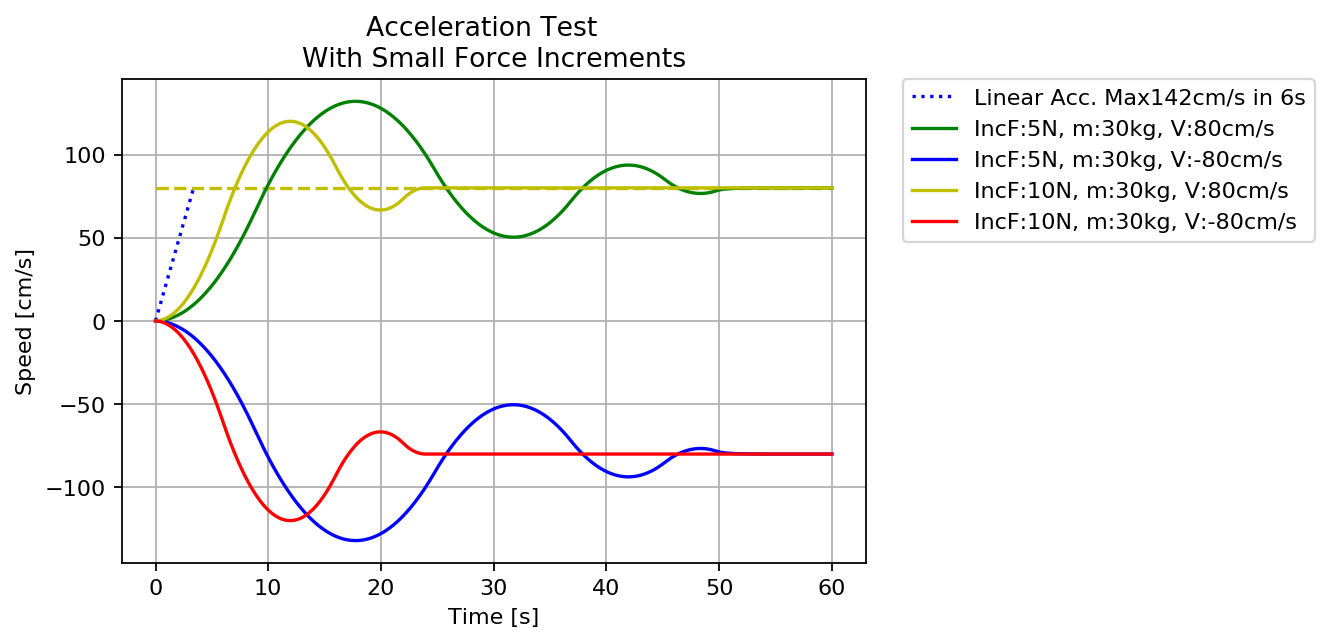

In [3]:
a  = 142 / 6 # base acceleration
T  = 60 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
Ts  = np.arange(0, T + Fs, Fs) #sampling time

plt.figure(dpi=160)
plt.grid(True)
plt.title('With Small Force Increments')
plt.suptitle('Acceleration Test')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc. Max142cm/s in 6s')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 5), 'g', label='IncF:5N, m:30kg, V:80cm/s')
plt.plot(Ts, autocruising(Ts, 30, a, -V, 0, 5), 'b', label='IncF:5N, m:30kg, V:-80cm/s')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 10), 'y', label='IncF:10N, m:30kg, V:80cm/s')
plt.plot(Ts, autocruising(Ts, 30, a, -V, 0, 10), 'r', label='IncF:10N, m:30kg, V:-80cm/s')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()


<Figure size 432x288 with 0 Axes>

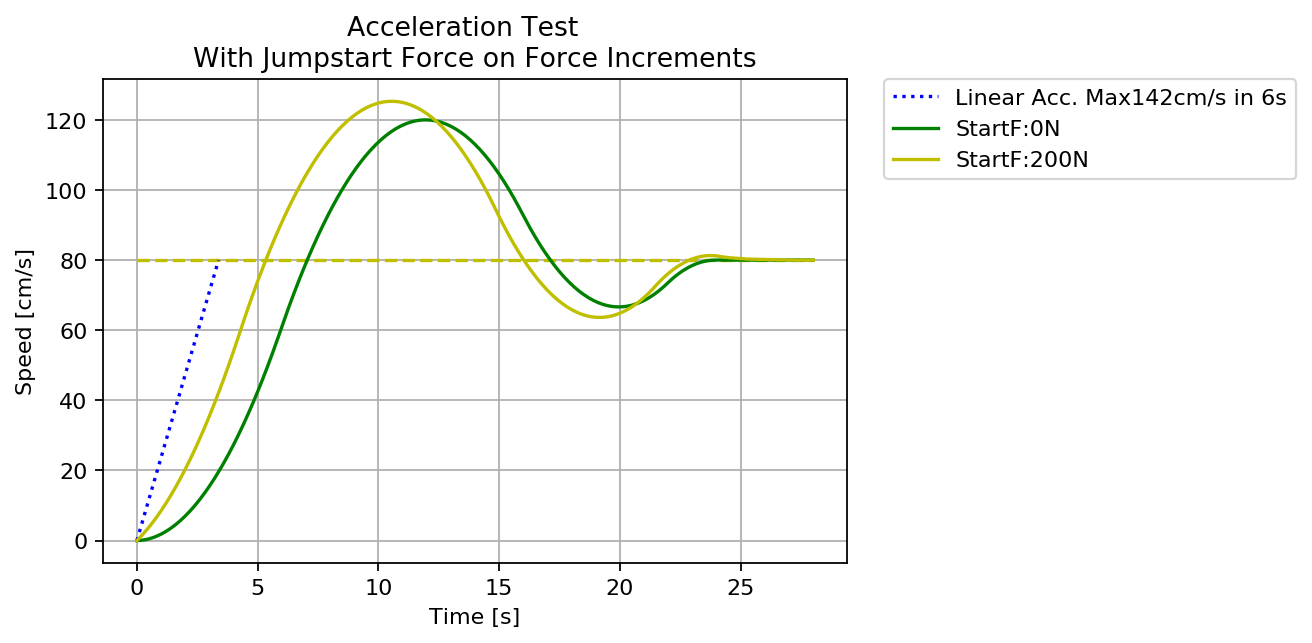

In [4]:
a  = 142 / 6 # base acceleration
T  = 28 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
Ts  = np.arange(0, T + Fs, Fs) #sampling time

plt.figure(dpi=160)
plt.grid(True)
plt.title('With Jumpstart Force on Force Increments')
plt.suptitle('Acceleration Test')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc. Max142cm/s in 6s')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 10, 0), 'g', label='StartF:0N')
# plt.plot(Ts, autocruising(Ts, 30, a, -V, 0, 10, 0), 'b', label='StartF:0N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 10, 200), 'y', label='StartF:200N')
# plt.plot(Ts, autocruising(Ts, 30, a, -V, 0, 10, -200), 'r', label='StartF:-200N')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()


I should try to check ramining time to meet the desired speed.
Stabile acceleration means force can directly related to acceleration.

<Figure size 432x288 with 0 Axes>

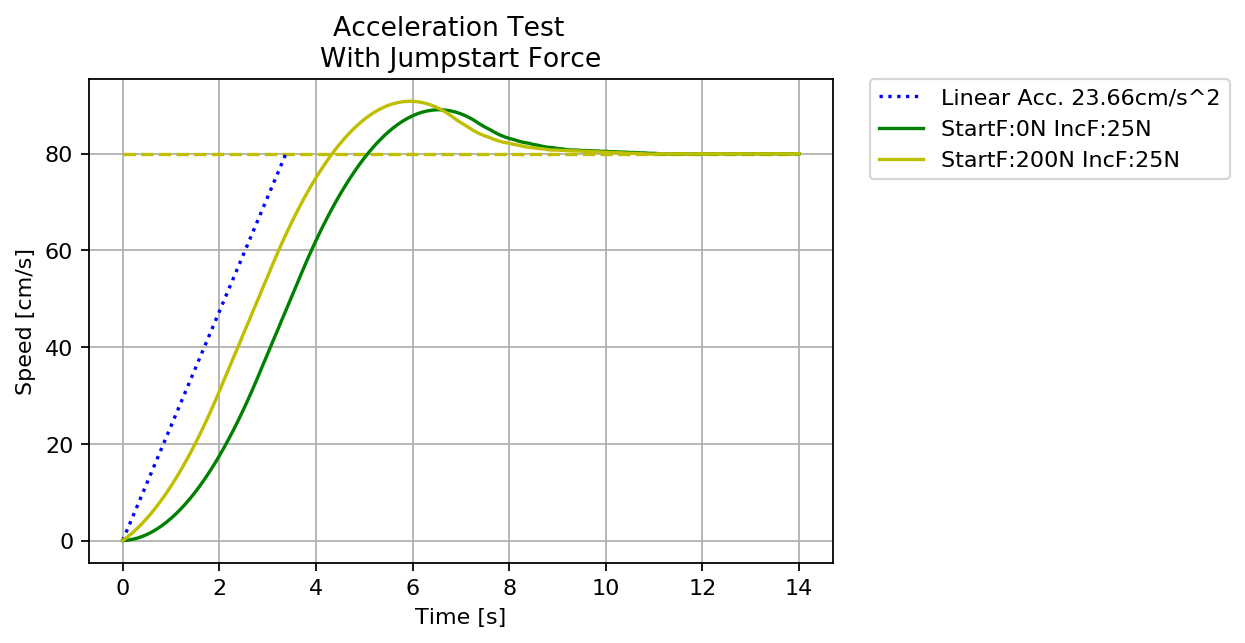

In [5]:
a  = 142 / 6 # base acceleration
T  = 14 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
Ts  = np.arange(0, T + Fs, Fs) #sampling time

plt.figure(dpi=160)
plt.grid(True)
plt.title('With Jumpstart Force')
plt.suptitle('Acceleration Test')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc. 23.66cm/s^2')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 25, 0), 'g', label='StartF:0N IncF:25N')
# plt.plot(Ts, autocruising(Ts, 30, a, -V, 0, 25, 0), 'b', label='StartF:0N IncF:25N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 25, 200), 'y', label='StartF:200N IncF:25N')
# plt.plot(Ts, autocruising(Ts, 30, a, -V, 0, 25, -200), 'r', label='StartF:-200N IncF:25N')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

In [ ]:
a  = 142 / 6 # base acceleration
T  = 24 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
m  = 30 # mass kg
Ts  = np.arange(0, T + Fs, Fs) #sampling time

plt.figure(dpi=160)
plt.grid(True)
plt.title('Acceleration Test small increments')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc.')
plt.plot(Ts, autocruising2(Ts, 20, a, V, 0, 5), 'g', label='IncF:5N, m:20kg, V:80cm/s')
plt.plot(Ts, autocruising2(Ts, 30, a, -V, 0, 5), 'b', label='IncF:5N, m:30kg, V:80cm/s')
plt.plot(Ts, autocruising2(Ts, 20, a, V, 0, 10), 'y', label='IncF:10N, m:20kg, V:80cm/s')
plt.plot(Ts, autocruising2(Ts, 30, a, -V, 0, 10), 'r', label='IncF:10N, m:30kg, V:80cm/s')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<Figure size 432x288 with 0 Axes>

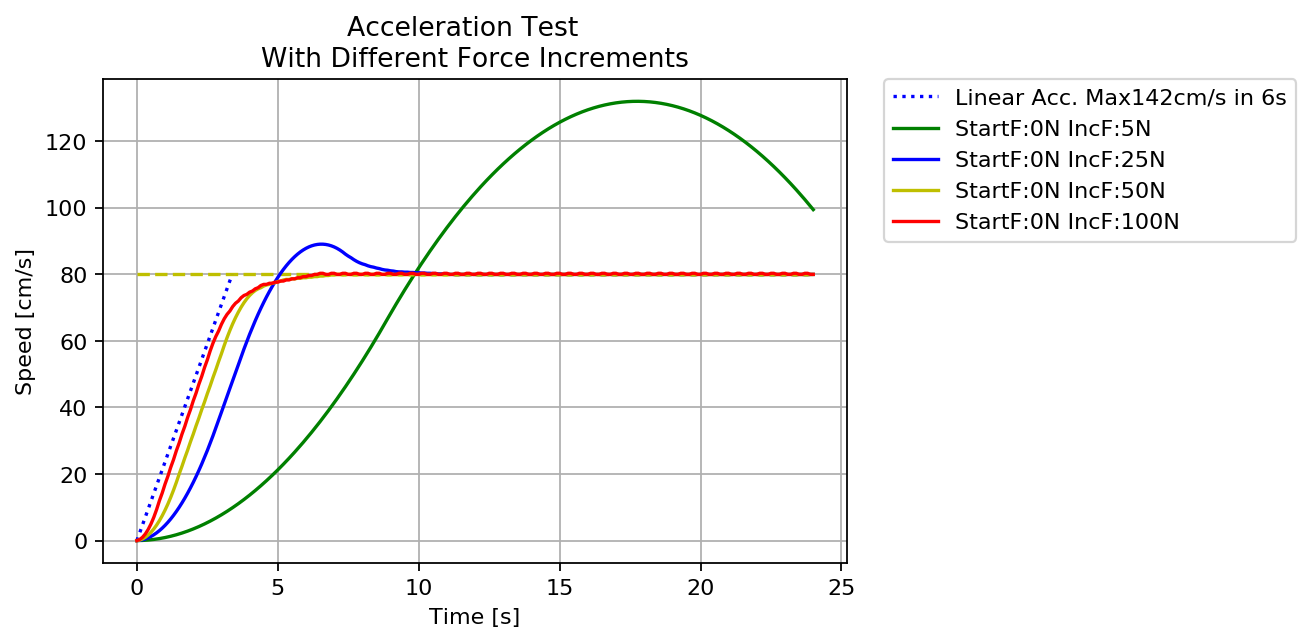

In [6]:
a  = 142 / 6 # base acceleration
T  = 24 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
Ts  = np.arange(0, T + Fs, Fs) #sampling time

plt.figure(dpi=160)
plt.grid(True)
plt.title('With Different Force Increments')
plt.suptitle('Acceleration Test')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc. Max142cm/s in 6s')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 5, 0), 'g', label='StartF:0N IncF:5N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 25, 0), 'b', label='StartF:0N IncF:25N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 50, 0), 'y', label='StartF:0N IncF:50N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 100, 0), 'r', label='StartF:0N IncF:100N')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

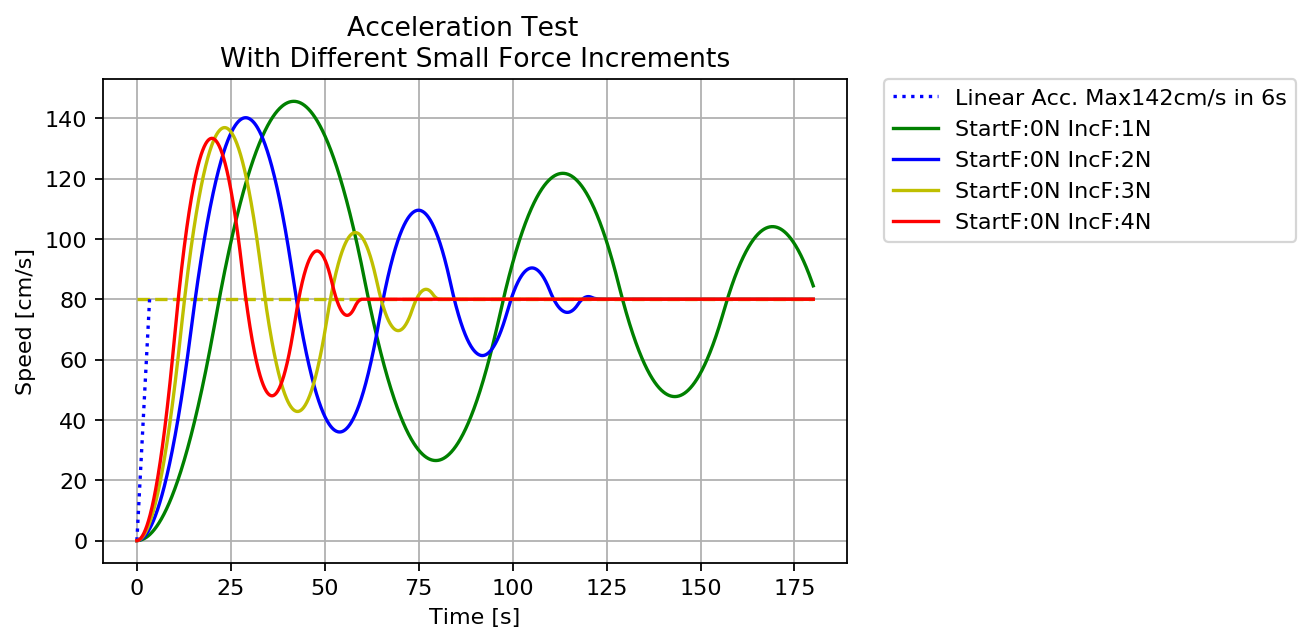

In [7]:
a  = 142 / 6 # base acceleration
T  = 180 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
Ts  = np.arange(0, T + Fs, Fs) #sampling time

plt.figure(dpi=160)
plt.grid(True)
plt.title('With Different Small Force Increments')
plt.suptitle('Acceleration Test')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc. Max142cm/s in 6s')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 1, 0), 'g', label='StartF:0N IncF:1N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 2, 0), 'b', label='StartF:0N IncF:2N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 3, 0), 'y', label='StartF:0N IncF:3N')
plt.plot(Ts, autocruising(Ts, 30, a, V, 0, 4, 0), 'r', label='StartF:0N IncF:4N')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.clf()